In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('cc.png')

cv2_imshow(img)

h = int(img.shape[0])
w = int(img.shape[1])
count = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = img[x][y]
    count[val] += 1

#histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(count)
plt.xlim([0,256])
plt.show()


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('bookpage.jpg')
print("original Image:")
cv2_imshow(img)
val = 0
h = int(img.shape[0])
w = int(img.shape[1])
count = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = img[x][y]
    count[val] += 1

print("Image histogram:")
plt.plot(count)
plt.xlim([0,256])
plt.show()

"""
Applying masking
"""
mask = np.zeros([h,w])
thresh = 15
for a in range(0,h):
  for b in range(0,w):
    val = img[a][b]
    if val[0] < thresh:
      mask[a,b] = 0
    elif val[0] >= thresh:
      mask[a,b] = 1

new_img = np.zeros([h,w])
for a in range(0,h):
  for b in range(0,w):
    val = img[a][b]
    new_img[a][b] = mask[a][b] and val[0]
print("Showing foreground:")  
cv2_imshow(new_img)


original Image:


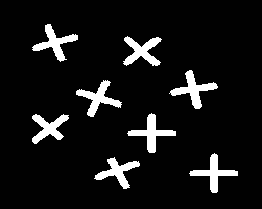

Image histogram:


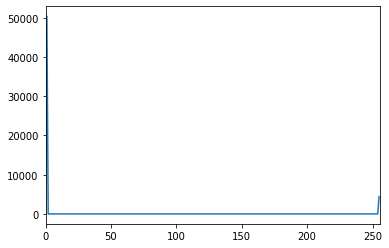

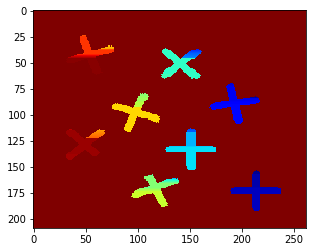

Number of component labels: 70


In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('cc.png',0)
print("original Image:")
cv2_imshow(img)
val = 0
h = int(img.shape[0])
w = int(img.shape[1])
count = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = img[x][y]
    count[val] += 1

print("Image histogram:")
plt.plot(count)
plt.xlim([0,256])
plt.show()

"""
Applying masking
"""
mask = np.zeros([h,w])
thresh = 15
for a in range(0,h):
  for b in range(0,w):
    val = img[a][b]
    if val < thresh:
      mask[a,b] = 0
    elif val >= thresh:
      mask[a,b] = 1
"""
Applying connected component labelling on mask array
"""

label = 1
connections = {}
index = 0
mask_h = int(mask.shape[0])
mask_w = int(mask.shape[1])

                                #First Pass
for y in range(0,mask_w):
  for x in range(0, mask_h):
    if x == 0 and y == 0:                             #checking for first index
      if mask[x,y] == 1:
        mask[x,y] = label
        label += 1
    elif y == 0 and x > 0:                            #checking only left neighbour for first row
      if mask[x,y] == 1 and mask[x-1,y] == 0:
        mask[x,y] = label
        label += 1
      elif mask[x,y] == 1 and mask[x-1,y] != 0:
        neighbour = mask[x-1,y]
        mask[x,y] = neighbour
    elif x == 0 and y > 0:                            #checking only top neighbour for first column
      if mask[x,y] == 1 and mask[x,y-1] == 0:
        mask[x,y] = label
        label += 1
      elif mask[x,y] == 1 and mask[x,y-1] != 0:
        neighbour = mask[x,y-1]
        mask[x,y] = neighbour
    elif x > 0 and y > 0:
      if mask[x,y] == 1:
        if mask[x-1,y] == 0 and mask[x,y-1] == 0:      #if both top and left neighbours not labelled assign new label
          mask[x,y] = label
          label += 1
        elif (mask[x-1,y] != 0 and mask[x,y-1] == 0) or (mask[x-1,y] == 0 and mask[x,y-1] != 0):      #if either top or left neighbours assigned label
          top = mask[x,y-1]
          left = mask[x-1,y]
          if top == 0:
            neighbour = left
            mask[x,y] = neighbour
          elif left == 0:
            neighbour = top
            mask[x,y] = neighbour
        elif (mask[x-1,y] > 0 and mask[x,y-1] > 0) and (mask[x-1,y] != mask[x,y-1]):                  #if both neighbours different assign smaller label
          top = mask[x,y-1]
          left = mask[x-1,y]
          if top < left:
            neighbour = top
            mask[x,y] = neighbour
            connections[int(left)] = []
            connections[int(left)].append(int(top))
          elif left < top:
            neighbour = left
            mask[x,y] = neighbour
            connections[int(top)] = []
            connections[int(top)].append(int(left))
        elif (mask[x-1,y] > 0 and mask[x,y-1] > 0) and (mask[x-1,y] == mask[x,y-1]):
          neighbour = mask[x-1,y]
          mask[x,y] = neighbour

                            #Second pass
for y in range(0,mask_w):
  for x in range(0,mask_h):
    if mask[x,y] > 0:
      index = int(mask[x,y])
      if index in connections:
        new_val = connections[index][0]
        mask[x,y] = new_val

plt.imshow(mask, cmap="jet_r")
plt.show()

component_count = 0
flag = mask[0,0]
for y in range(0,mask_w):
  for x in range(0,mask_h):
    if mask[x,y] > flag:
      component_count += 1
      flag = mask[x,y]
print(f'Number of component labels: {component_count}')
